Inicio

In [542]:
#Planejamento:
 #   -Sanity check transactional data;
 #   -Sanity check Test data;
 #   -Mergir as duas tabelas a partir da coluna CodItem;
 #   -Calcular a lucratividade  por procedimento realizado. Utilizando a coluna 'TestingCost';
 #   -Categorizar a coluna 'Date of Birth' por faixa etária;
 #   -Ranking de laboratórios por lucratividade;
 #   -Ranking de sexo por lucratividade;
 #   -Ranking de faixa etaria por lucratividade;
 #   -Ranking de item por lucratividade;


#Python Version: 3.9.7

In [543]:
#importando bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date

In [544]:
#importando dados 
df_raw_transactional_data = pd.read_csv('transactional_data.csv', sep = ";", dtype={"Gender": "category"})

In [545]:
#df_raw_transactional_data['Date of birth'] = pd.to_datetime(df_raw_transactional_data['Date of birth'])
df_raw_transactional_data['Date of service'] = pd.to_datetime(df_raw_transactional_data['Date of service'])
df_raw_transactional_data['Testing Cost'] = df_raw_transactional_data['Testing Cost'].astype(str)

In [546]:
df_raw_transactional_data["Testing Cost"] = df_raw_transactional_data["Testing Cost"].replace(",", ".", regex = True)

In [547]:
df_raw_transactional_data['Testing Cost'] = pd.to_numeric(df_raw_transactional_data['Testing Cost'].astype(str))


In [548]:
df_raw_transactional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355241 entries, 0 to 2355240
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Patient Id       object        
 1   Gender           category      
 2   Date of birth    object        
 3   Date of service  datetime64[ns]
 4   Service Id       object        
 5   Lab Id           object        
 6   CodItem          int64         
 7   Testing Cost     float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 128.0+ MB


In [549]:
#Verificando o dataset
df_raw_transactional_data.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0


In [550]:
#Verificando a ocorrencia de valores missing
df_raw_transactional_data.isnull().sum()

Patient Id         0
Gender             0
Date of birth      1
Date of service    0
Service Id         0
Lab Id             0
CodItem            0
Testing Cost       0
dtype: int64

In [551]:
#Analisando a linha com valor missing. Decidi remover pois e apenas uma ocorrencia e a coluna date of birth e importante
df_raw_transactional_data[df_raw_transactional_data["Date of birth"].isnull()]

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
1253947,7659985004-1,F,NaN,2020-02-22,7659985004-2-1,L152,70000107,48.0


In [552]:
#Removendo a linha
df_raw_transactional_data = df_raw_transactional_data.dropna()
df_raw_transactional_data.isnull().sum()

Patient Id         0
Gender             0
Date of birth      0
Date of service    0
Service Id         0
Lab Id             0
CodItem            0
Testing Cost       0
dtype: int64

Variavel gender

In [553]:
df_raw_transactional_data["Gender"].value_counts()

F    1500464
M     854766
I         10
Name: Gender, dtype: int64

In [554]:
df_raw_transactional_data[ df_raw_transactional_data["Gender"] == "I"]

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
85068,-2,I,01/01/1900 00:00:00,2019-02-22,532800338922-132,L069,70003759,14.0
356628,-2,I,01/01/1900 00:00:00,2019-04-04,573200638885-52,L140,70000301,12.0
356629,-2,I,01/01/1900 00:00:00,2019-04-04,573200638885-52,L140,70001276,53.0
356630,-2,I,01/01/1900 00:00:00,2019-04-04,573200638885-52,L140,70004134,10.0
356631,-2,I,01/01/1900 00:00:00,2019-04-04,573200638885-52,L140,70003200,9.0
356632,-2,I,01/01/1900 00:00:00,2019-04-04,573200638885-52,L140,70002619,12.0
356633,-2,I,01/01/1900 00:00:00,2019-05-04,571904995402-38,L133,70002141,47.0
356634,-2,I,01/01/1900 00:00:00,2019-05-04,571904995402-38,L133,70003239,47.0
637178,-2,I,01/01/1900 00:00:00,2019-08-31,569403826990-11,L121,70006532,0.0
637179,-2,I,01/01/1900 00:00:00,2019-08-31,569403826990-11,L121,70006532,0.0


In [555]:
#Remover dados que contem  gender = I
df_raw_transactional_data = df_raw_transactional_data[ df_raw_transactional_data["Gender"] != "I"] 

In [643]:
df_raw_transactional_data[ df_raw_transactional_data["Gender"] == "I"]

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,Age


In [556]:
#Checando se a coluna foi corretamenta limpa
df_raw_transactional_data["Gender"].value_counts()

F    1500464
M     854766
I          0
Name: Gender, dtype: int64

<AxesSubplot:>

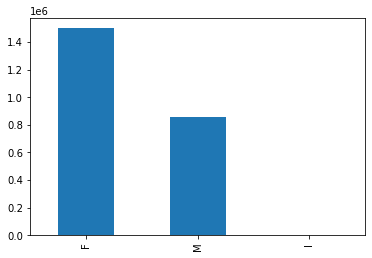

In [557]:
df_raw_transactional_data["Gender"].value_counts().plot.bar()

Variavel date of birth

In [558]:
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y %H:%M:%S").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [559]:

df_raw_transactional_data['Age'] = df_raw_transactional_data['Date of birth'].apply(age)
  
print(df_raw_transactional_data)

                 Patient Id Gender        Date of birth Date of service  \
0        10210830256-BIO003      F  01/08/1976 00:00:00      2019-01-07   
1        10210830256-BIO003      F  01/08/1976 00:00:00      2019-01-07   
2        10210830256-BIO003      F  01/08/1976 00:00:00      2019-01-07   
3        10210830256-BIO003      F  01/08/1976 00:00:00      2019-01-07   
4        10210830256-BIO003      F  01/08/1976 00:00:00      2019-01-07   
...                     ...    ...                  ...             ...   
2355236        7664157546-1      M  06/03/1971 00:00:00      2021-02-12   
2355237        7664157546-1      M  06/03/1971 00:00:00      2021-02-12   
2355238        7664157546-1      M  06/03/1971 00:00:00      2021-02-12   
2355239        7664157546-1      M  06/03/1971 00:00:00      2021-02-12   
2355240        7664157546-1      M  06/03/1971 00:00:00      2021-02-12   

              Service Id Lab Id   CodItem  Testing Cost  Age  
0        571904533475-38   L133  700

In [560]:
df_raw_transactional_data.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,Age
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,45
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0,45
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0,45
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0,45
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0,45


In [561]:
df1= df_raw_transactional_data

In [562]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355230 entries, 0 to 2355240
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Patient Id       object        
 1   Gender           category      
 2   Date of birth    object        
 3   Date of service  datetime64[ns]
 4   Service Id       object        
 5   Lab Id           object        
 6   CodItem          int64         
 7   Testing Cost     float64       
 8   Age              int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 164.0+ MB


<AxesSubplot:ylabel='Frequency'>

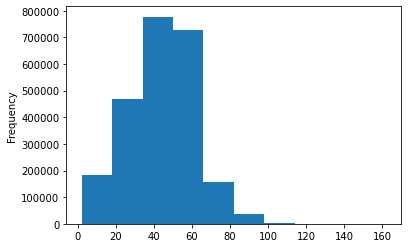

In [563]:
df1["Age"].plot.hist()

In [564]:
#A idade maxima usada sera de 105 anos
df1[df1["Age"] >105].count()

Patient Id         73
Gender             73
Date of birth      73
Date of service    73
Service Id         73
Lab Id             73
CodItem            73
Testing Cost       73
Age                73
dtype: int64

In [565]:
#Removendo pacientes com mais de 105 anos
df1= df1[df1["Age"] <= 105]

<AxesSubplot:ylabel='Frequency'>

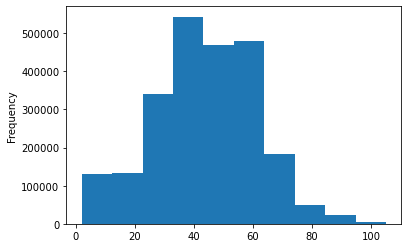

In [566]:
df1["Age"].plot.hist() 

In [567]:
df1["Age"].min() , df1["Age"].max() , df1["Age"].median(), df1["Age"].mean()

(2, 105, 44.0, 43.64788037485399)

<AxesSubplot:>

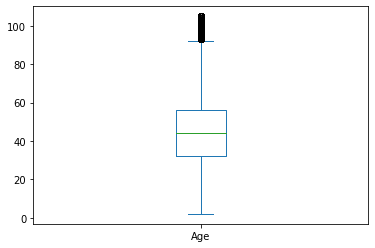

In [568]:
df1["Age"].plot.box()

In [569]:
df1.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,Age
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,45
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0,45
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0,45
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0,45
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0,45


Variavel Lab Id

In [570]:
df1["Lab Id"].value_counts()

L133    122838
L152     95876
L139     94217
L121     89048
L166     76749
         ...  
L660       645
L127       236
L967       101
L149        68
L665        24
Name: Lab Id, Length: 118, dtype: int64

In [571]:
df1 = df1[df1["Lab Id"] != "-2"]

Variavel CodItem

In [572]:
df1["CodItem"].value_counts()

70000638    164280
70004134    116193
70006146     79751
70004185     77840
70003200     70565
             ...  
70008512         1
70008514         1
70006558         1
70006492         1
70001506         1
Name: CodItem, Length: 2063, dtype: int64

Variavel Testing Cost

<AxesSubplot:ylabel='Frequency'>

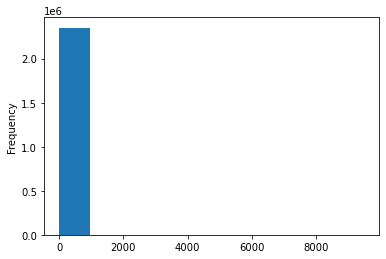

In [573]:
df1["Testing Cost"].plot.hist() 

<AxesSubplot:>

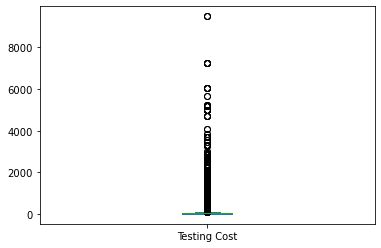

In [574]:
df1["Testing Cost"].plot.box() 

In [575]:
df1["Testing Cost"].max() , df1["Testing Cost"].min() ,df1["Testing Cost"].median() , df1["Testing Cost"].mean() 

(9500.0, 0.0, 24.0, 51.14477476229597)

Decisao importante: aqui percebemos que existem varios registros nos quais o gasto do cliente com o exame foi de zero reais. Neste momento o cientista de dados deve entrar em contato com a equipe que domina a area de negocios para entender por que isso ocorreu
e realizar o devido tratamento dos dados.
Opcoes:
    - Estes clientes estavam usando convenio de saude
    - Estes clientes receberam o exame de graca por algum motivo
    - Houve um erro operacional e o valor pago pleos clientes nao foi computado

Neste caso irei considera a terceira opcao (erro operacional) e irei substituir os valores 0 pela mediana dos valores pagos pelos clientes historicamente.

In [576]:

df1[df1["Testing Cost"] == 0].count()

Patient Id         41144
Gender             41144
Date of birth      41144
Date of service    41144
Service Id         41144
Lab Id             41144
CodItem            41144
Testing Cost       41144
Age                41144
dtype: int64

In [577]:
df1["Testing Cost"] =  df1["Testing Cost"].replace(0.0, 24.0)

In [578]:
df1.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,Age
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,45
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0,45
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0,45
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0,45
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0,45


In [579]:
df1[df1["Testing Cost"] == 0 ]

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,Age


In [580]:
df_cost = df1[df1["Testing Cost"] < 10]

<AxesSubplot:>

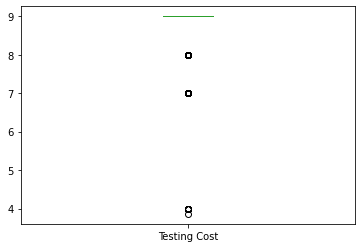

In [581]:
df_cost["Testing Cost"].plot.box()

In [582]:
df_cost[df_cost["Testing Cost"] >7000]

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,Age


<AxesSubplot:ylabel='Frequency'>

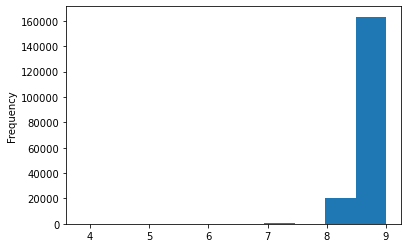

In [583]:
df_cost["Testing Cost"].plot.hist()

In [584]:
df_final_sanity_check_transactional_data = df1
df_final_sanity_check_transactional_data.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,Age
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,45
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0,45
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0,45
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0,45
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0,45


In [585]:
df_final_sanity_check_transactional_data["Testing Cost"].min()

3.86

<AxesSubplot:>

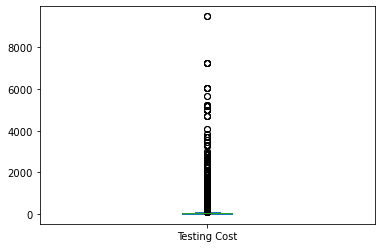

In [586]:
df_final_sanity_check_transactional_data["Testing Cost"].plot.box()


Final sanity check transactional data

Inicio sanity check test data

In [587]:
df_raw_test_data = pd.read_csv('test_data.csv', sep = ",", 
dtype={"Desc Item": "category",
"Category": "category",
"Family": "category",
"Speciality": "category", })

In [588]:
df_raw_test_data.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULTADO: MG/DL)",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE RESULTADO: NG/ML)",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE RESULTADO: MG/DL)",CA,CORELAB,BIOCHEMISTRY,1.02


In [589]:
df_raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CodItem       2002 non-null   int64   
 1   Desc Item     2002 non-null   category
 2   Category      2002 non-null   category
 3   Family        2002 non-null   category
 4   Speciality    2002 non-null   category
 5   Testing Cost  2002 non-null   float64 
dtypes: category(4), float64(1), int64(1)
memory usage: 125.0 KB


In [590]:
#Verificando a ocorrencia de valores missing
df_raw_test_data.isnull().sum()

CodItem         0
Desc Item       0
Category        0
Family          0
Speciality      0
Testing Cost    0
dtype: int64

Variavel Desc Item

<AxesSubplot:ylabel='Frequency'>

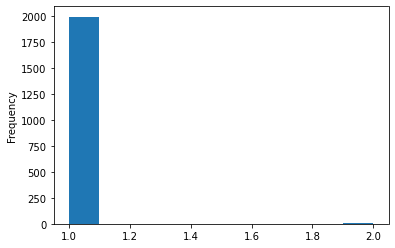

In [591]:
df_raw_test_data["Desc Item"].value_counts().plot.hist()

Variavel Category

<AxesSubplot:>

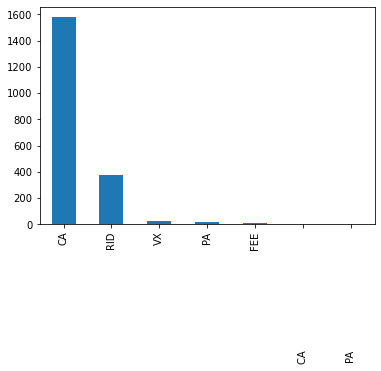

In [592]:
df_raw_test_data["Category"].value_counts()
df_raw_test_data["Category"].value_counts().plot.bar()

Variavel Family

In [593]:
df_raw_test_data["Family"].value_counts()

CORELAB       990
GENETICS      258
ULTRASOUND    116
TOXICO        106
HEMATO        103
MRI            78
X-RAY          70
CT SCAN        61
MICROBIO       52
VACCINE        27
COPRO          24
URINE          23
NEONATO        22
INTERNAL       12
CARDIO         10
GENITOURIN      9
GASTROENT       8
FEE             8
ANATOMO         8
CYTO            7
MAMMO           5
DENSITO         4
DIAG            1
Name: Family, dtype: int64

<AxesSubplot:>

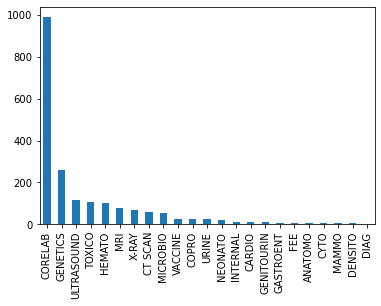

In [594]:
df_raw_test_data["Family"].value_counts().plot.bar()

Variavel Speciality

In [595]:
df_raw_test_data["Speciality"].value_counts()

IMMUNOHORMONE       472
BIOCHEMISTRY        248
SPECIAL GENETICS    182
ALLERGY             182
SKELETAL MUSCLE      88
                   ... 
LARYNGOSCOPY          1
LIQUID CYTOLOGY       1
MAMA                  1
RESEARCH FEE          1
ABPM                  1
Name: Speciality, Length: 77, dtype: int64

<AxesSubplot:>

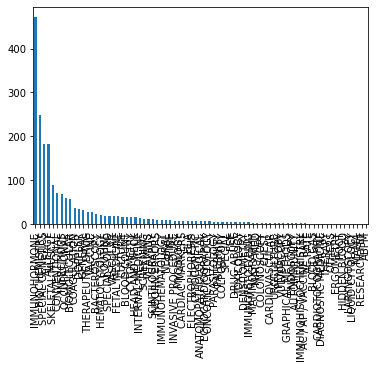

In [596]:
df_raw_test_data["Speciality"].value_counts().plot.bar()

Variavel Testing cost

In [597]:
df2 = df_raw_test_data

<AxesSubplot:ylabel='Frequency'>

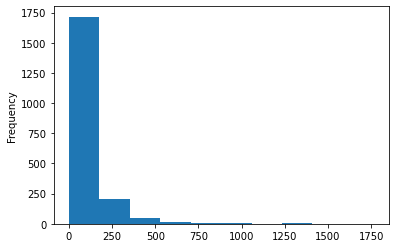

In [598]:
df2["Testing Cost"].plot.hist() 

<AxesSubplot:>

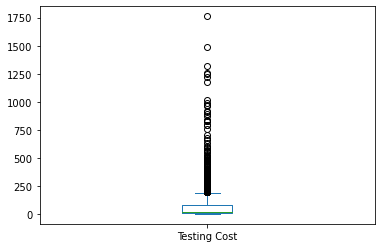

In [599]:
df2["Testing Cost"].plot.box() 

In [600]:
df2["Testing Cost"].max() , df2["Testing Cost"].min() ,df2["Testing Cost"].median() , df2["Testing Cost"].mean()

(1762.46, 0.0, 21.189999999999998, 77.76745254745249)

In [601]:
df2[df2["Testing Cost"] == 0].count()

CodItem         7
Desc Item       7
Category        7
Family          7
Speciality      7
Testing Cost    7
dtype: int64

In [602]:
df2[df2["Testing Cost"] == 0.0]

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
187,70006809,RM MATERIAIS/MEDICAMENTOS,RID,MRI,MAT / MED,0.0
343,70006810,TC MATERIAIS/MEDICAMENTOS,RID,CT SCAN,MAT / MED,0.0
818,70002489,VOLUME URINARIO,CA,CORELAB,BIOCHEMISTRY,0.0
1536,70001660,"PROLACTINA (BASAL DE PROVA), SORO",CA,CORELAB,IMMUNOHORMONE,0.0
1860,70006904,DERIVADO - DOPPLER TIREOIDE,RID,ULTRASOUND,DOPPLER,0.0
1877,70006910,DERIVADO - DOPPLER ABDOME SUPERIOR,RID,ULTRASOUND,DOPPLER,0.0
1978,70006899,DERIVADO - DOPPLER VASOS CERVICAIS ART,RID,ULTRASOUND,DOPPLER,0.0


In [603]:
df2["Testing Cost"] =  df2["Testing Cost"].replace(0.0, 21.19)

In [604]:
df2[df2["Testing Cost"] == 0].count()

CodItem         0
Desc Item       0
Category        0
Family          0
Speciality      0
Testing Cost    0
dtype: int64

In [605]:
df2.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULTADO: MG/DL)",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE RESULTADO: NG/ML)",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE RESULTADO: MG/DL)",CA,CORELAB,BIOCHEMISTRY,1.02


Final Sanity check test data

Mergir as duas tabelas a partir da coluna CodItem

In [606]:
df_merged = df1.merge(df2.loc[:, ["CodItem", "Category", "Testing Cost"]], how = "inner", on = ["CodItem"])

In [607]:
df_merged.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost_x,Age,Category,Testing Cost_y
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,45,CA,1.78
1,10225666807-BIO002,F,16/07/1968 00:00:00,2019-01-15,573103867832-51,L139,70003237,9.0,53,CA,1.78
2,571700011536-BIO002,F,17/04/1961 00:00:00,2019-01-04,571706608210-36,L131,70003237,9.0,60,CA,1.78
3,574400001820-BIO002,F,01/04/1966 00:00:00,2019-01-17,574400919309-64,L150,70003237,9.0,56,CA,1.78
4,10210855836-BIO003,F,25/12/1980 00:00:00,2019-02-08,575007148185-72,L155,70003237,9.0,41,CA,1.78


In [608]:
df_merged.drop(["Date of birth", "Date of service", "Service Id", "CodItem"], axis=1, inplace=True)

In [609]:
df_merged["Faturamento"] = df_merged["Testing Cost_x"] - df_merged["Testing Cost_y"]

In [610]:
df_merged.head()

,Patient Id,Gender,Lab Id,Testing Cost_x,Age,Category,Testing Cost_y,Faturamento
0,10210830256-BIO003,F,L133,9.0,45,CA,1.78,7.22
1,10225666807-BIO002,F,L139,9.0,53,CA,1.78,7.22
2,571700011536-BIO002,F,L131,9.0,60,CA,1.78,7.22
3,574400001820-BIO002,F,L150,9.0,56,CA,1.78,7.22
4,10210855836-BIO003,F,L155,9.0,41,CA,1.78,7.22


In [611]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353297 entries, 0 to 2353296
Data columns (total 8 columns):
 #   Column          Dtype   
---  ------          -----   
 0   Patient Id      object  
 1   Gender          category
 2   Lab Id          object  
 3   Testing Cost_x  float64 
 4   Age             int64   
 5   Category        category
 6   Testing Cost_y  float64 
 7   Faturamento     float64 
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 130.2+ MB


Variavel Faturamento

<AxesSubplot:ylabel='Frequency'>

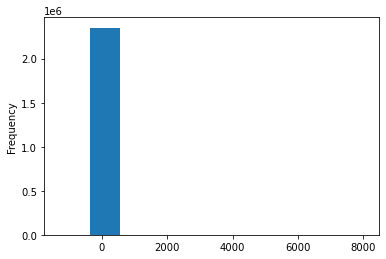

In [612]:
df_merged["Faturamento"].plot.hist() 

<AxesSubplot:>

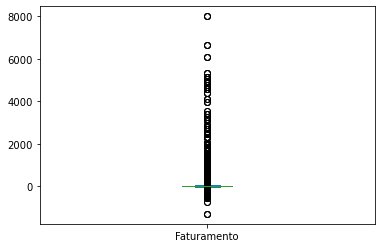

In [613]:
df_merged["Faturamento"].plot.box() 

In [614]:
df_merged["Faturamento"].max() ,df_merged["Faturamento"].min() , df_merged["Faturamento"].median() , df_merged["Faturamento"].mean()

(8009.23, -1291.21, 14.98, 35.92372489352855)

In [615]:
df_merged[df_merged["Faturamento"] <= 0 ]

,Patient Id,Gender,Lab Id,Testing Cost_x,Age,Category,Testing Cost_y,Faturamento
452451,10210848051-BIO003,F,L133,46.0,39,RID,119.73,-73.73
452452,223182276-BIO003,F,L133,46.0,63,RID,119.73,-73.73
452453,562000042929-BIO002,F,L061,46.0,58,RID,119.73,-73.73
452454,573300004569-BIO002,F,L152,46.0,53,RID,119.73,-73.73
452455,10225705055-BIO002,F,L139,46.0,33,RID,119.73,-73.73
...,...,...,...,...,...,...,...,...
2353169,7659947126-1,M,L160,15.0,39,CA,59.84,-44.84
2353170,7661477795-1,M,L157,15.0,36,CA,59.84,-44.84
2353249,7661142286-1,F,L967,24.0,36,PA,29.88,-5.88
2353250,7663214635-1,F,L123,24.0,63,PA,29.88,-5.88


In [616]:
#Calculando o percentual de operacoes que deram prejuizo
((df_merged[df_merged["Faturamento"] <= 0 ].count()) / (df_merged.count()) ) * 100


Patient Id        1.680876
Gender            1.680876
Lab Id            1.680876
Testing Cost_x    1.680876
Age               1.680876
Category          1.680876
Testing Cost_y    1.680876
Faturamento       1.680876
dtype: float64

Categorizando a coluna de idade em faixas etarias



Catgorizacao por idades:
    Criancas -> 0 ate 9 anos
    Jovens -> 10 ate 19 anos
    Adultos -> 20 ate 59 anos 
    Idosos -> 60+ anos

In [617]:
df = df_merged

In [618]:
def faixaetaria(i):
    if i >= 0 &   i <= 9:
        return ("crianca")
    elif i >=10 & i <= 19:
        return("jovem")
    elif i >=20 & i<=59:
        return ("adulto")
    else:
        return ("idoso")

In [619]:
df["faixa etaria"] = df["Age"].apply(faixaetaria)

In [620]:
df.head()

,Patient Id,Gender,Lab Id,Testing Cost_x,Age,Category,Testing Cost_y,Faturamento,faixa etaria
0,10210830256-BIO003,F,L133,9.0,45,CA,1.78,7.22,crianca
1,10225666807-BIO002,F,L139,9.0,53,CA,1.78,7.22,crianca
2,571700011536-BIO002,F,L131,9.0,60,CA,1.78,7.22,crianca
3,574400001820-BIO002,F,L150,9.0,56,CA,1.78,7.22,crianca
4,10210855836-BIO003,F,L155,9.0,41,CA,1.78,7.22,crianca


In [621]:
df["faixa etaria"] = pd.cut( x = np.array(df["Age"]), bins = [0,9,19,59,df["Age"].max()], labels = ["crianca", "jovem", "adulto", "idoso"])

In [622]:
df.head()

,Patient Id,Gender,Lab Id,Testing Cost_x,Age,Category,Testing Cost_y,Faturamento,faixa etaria
0,10210830256-BIO003,F,L133,9.0,45,CA,1.78,7.22,adulto
1,10225666807-BIO002,F,L139,9.0,53,CA,1.78,7.22,adulto
2,571700011536-BIO002,F,L131,9.0,60,CA,1.78,7.22,idoso
3,574400001820-BIO002,F,L150,9.0,56,CA,1.78,7.22,adulto
4,10210855836-BIO003,F,L155,9.0,41,CA,1.78,7.22,adulto


In [623]:
df["faixa etaria"].value_counts()

adulto     1710058
idoso       433384
jovem       111924
crianca      97931
Name: faixa etaria, dtype: int64

In [624]:
df[df["Age"] == 10]

,Patient Id,Gender,Lab Id,Testing Cost_x,Age,Category,Testing Cost_y,Faturamento,faixa etaria
377,10240407776-BIO010,F,L532,9.0,10,CA,1.78,7.22,jovem
386,427035262-BIO003,M,L134,9.0,10,CA,1.78,7.22,jovem
556,10210874756-BIO003,M,L121,9.0,10,CA,1.78,7.22,jovem
1022,10225758104-BIO002,F,L168,9.0,10,CA,1.78,7.22,jovem
1179,10240422785-BIO010,F,L523,9.0,10,CA,1.78,7.22,jovem
...,...,...,...,...,...,...,...,...,...
2352910,7664157625-1,M,L121,188.0,10,CA,6.15,181.85,jovem
2352959,7661761152-1,F,L155,70.0,10,RID,65.86,4.14,jovem
2352998,7659396351-1,M,L133,70.0,10,RID,65.86,4.14,jovem
2353222,7660556896-1,M,L121,83.0,10,CA,1.35,81.65,jovem


In [662]:
df3 = df[["Lab Id", "Gender", "Faturamento", "faixa etaria"]]

In [674]:
df4 = df[["Lab Id", "Gender", "Faturamento", "faixa etaria", "Testing Cost_y"]]

In [675]:
df4.isnull().sum()

Lab Id            0
Gender            0
Faturamento       0
faixa etaria      0
Testing Cost_y    0
dtype: int64

In [676]:
faturamento_lab_comparacao_preco_faturamento = df4.groupby(by = ["Lab Id"]  ).sum()

<AxesSubplot:xlabel='Faturamento', ylabel='Testing Cost_y'>

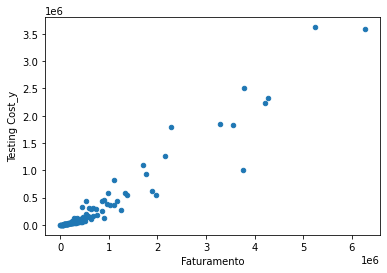

In [677]:
faturamento_lab_comparacao_preco_faturamento.plot.scatter( x = "Faturamento", y="Testing Cost_y")

In [678]:
faturamento_lab_comparacao_preco_faturamento.corr( method = "pearson")

,Faturamento,Testing Cost_y
Faturamento,1.000000,0.965144
Testing Cost_y,0.965144,1.000000


In [663]:
df3.head()

,Lab Id,Gender,Faturamento,faixa etaria
0,L133,F,7.22,adulto
1,L139,F,7.22,adulto
2,L131,F,7.22,idoso
3,L150,F,7.22,adulto
4,L155,F,7.22,adulto


In [664]:
df3.isnull().sum()

Lab Id          0
Gender          0
Faturamento     0
faixa etaria    0
dtype: int64

In [665]:
faturamento_lab = df3.groupby(by = ["Lab Id"]  ).sum()

In [666]:
faturamento_lab = faturamento_lab.sort_values(by = ["Faturamento"] , ascending = False)

<AxesSubplot:xlabel='Lab Id'>

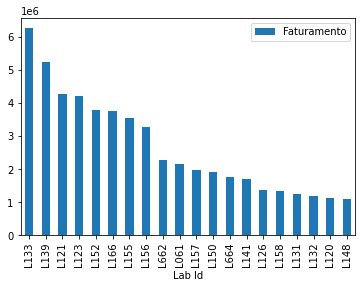

In [679]:
#PLOT COM OS DEZ LABORATORIOS MAIS LUCRATIVOS
faturamento_lab.head(20).plot.bar()

In [682]:
#20 laboratios mais lucrativos
faturamento_lab.head(20).index

Index(['L133', 'L139', 'L121', 'L123', 'L152', 'L166', 'L155', 'L156', 'L662',
       'L061', 'L157', 'L150', 'L664', 'L141', 'L126', 'L158', 'L131', 'L132',
       'L120', 'L148'],
      dtype='object', name='Lab Id')

In [668]:
faturamento_faix_et = df3.groupby(by = ["faixa etaria"]  ).sum().sort_values(by = ["Faturamento"], ascending = False)

In [669]:
faturamento_faix_et

,Faturamento
faixa etaria,
adulto,58713898.48
idoso,13896176.98
crianca,7430503.15
jovem,4498615.41


<AxesSubplot:xlabel='faixa etaria'>

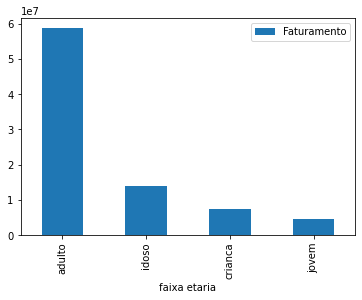

In [670]:
faturamento_faix_et.plot.bar()

In [671]:
faturamento_gen = df3.groupby(by = ["Gender"]  ).sum().sort_values(by = ["Faturamento"], ascending = False)
faturamento_gen =faturamento_gen.iloc[[0,1]]

In [672]:
faturamento_gen

,Faturamento
Gender,
F,54697163.99
M,29842030.03


<AxesSubplot:xlabel='Gender'>

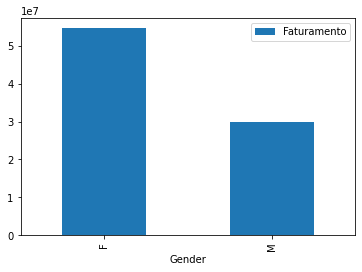

In [673]:
faturamento_gen.plot.bar()